<a href="https://colab.research.google.com/github/adithya398/2DPathFinder/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your image file (universe1.png or similar)


Saving universe1.png to universe1 (1).png
Start: (0, 0) | End: (99, 99)
Path exists!


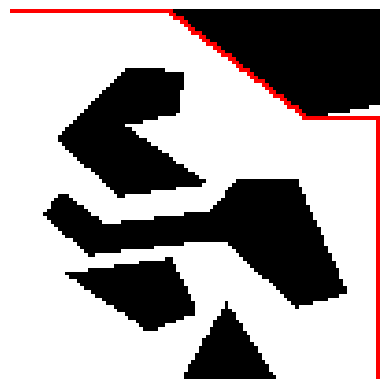

In [8]:
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from google.colab import files

def to_binary(image):
    if image.ndim == 3:
        image = image[..., 0]
    return (image < 128).astype(np.uint8)

def path_exists(universe, start_x, start_y, end_x, end_y):
    h, w = universe.shape
    visited = np.zeros_like(universe, dtype=bool)
    queue = deque([(start_x, start_y)])
    visited[start_y, start_x] = True

    while queue:
        x, y = queue.popleft()
        if (x, y) == (end_x, end_y):
            return True
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < w and 0 <= ny < h and universe[ny, nx] == 1 and not visited[ny, nx]:
                visited[ny, nx] = True
                queue.append((nx, ny))
    return False

def find_path(universe, start_x, start_y, end_x, end_y):
    h, w = universe.shape
    visited = np.zeros_like(universe, dtype=bool)
    prev = {}
    queue = deque([(start_x, start_y)])
    visited[start_y, start_x] = True

    while queue:
        x, y = queue.popleft()
        if (x, y) == (end_x, end_y):
            path = [(x, y)]
            while (x, y) in prev:
                x, y = prev[(x, y)]
                path.append((x, y))
            return path[::-1]
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < w and 0 <= ny < h and universe[ny, nx] == 1 and not visited[ny, nx]:
                visited[ny, nx] = True
                prev[(nx, ny)] = (x, y)
                queue.append((nx, ny))
    return None

def visualize(universe, path, output_file="path.png"):
    vis = np.stack([universe*255]*3, axis=-1).astype(np.uint8)
    for x, y in path:
        vis[y, x] = [255, 0, 0]
    plt.imshow(vis)
    plt.axis('off')
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

print("Please upload your image file (universe1.png or similar)")
uploaded = files.upload()
filename = next(iter(uploaded.keys()))

image = imageio.imread(filename)
binary = to_binary(image)

black_pixels = np.argwhere(binary == 1)
if len(black_pixels) < 2:
    print("Not enough black pixels for start/end points")
else:
    start_y, start_x = black_pixels[0]
    end_y, end_x = black_pixels[-1]

    print(f"Start: ({start_x}, {start_y}) | End: ({end_x}, {end_y})")
    if path_exists(binary, start_x, start_y, end_x, end_y):
        print("Path exists!")
        path = find_path(binary, start_x, start_y, end_x, end_y)
        visualize(binary, path)
    else:
        print("No path found")